In [21]:
import pandas as pd 
import numpy as np
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
import os
import networkx as nx
import math
import nltk
from nltk import word_tokenize
from nltk.book import *
from wordcloud import WordCloud

In [52]:
with open('full_dc.txt', 'w') as outfile:
    
    for i in os.listdir():
        if i.endswith(".txt"):
            with open(i, 'r') as infile:
                if "dc" in i:
                    outfile.write(infile.read())
        
                outfile.write("\n")

In [53]:
raw = open('full_dc.txt').read()
dc_tokens = word_tokenize(raw)


**Dont know if i am supposed to remove duplicates...**

In [54]:
words_dc = [w.lower() for w in dc_tokens if w.isalpha()]

Create your TF list for each universe.

List the top 15 words for each universe

In [55]:
freq_dist=FreqDist(words_dc)

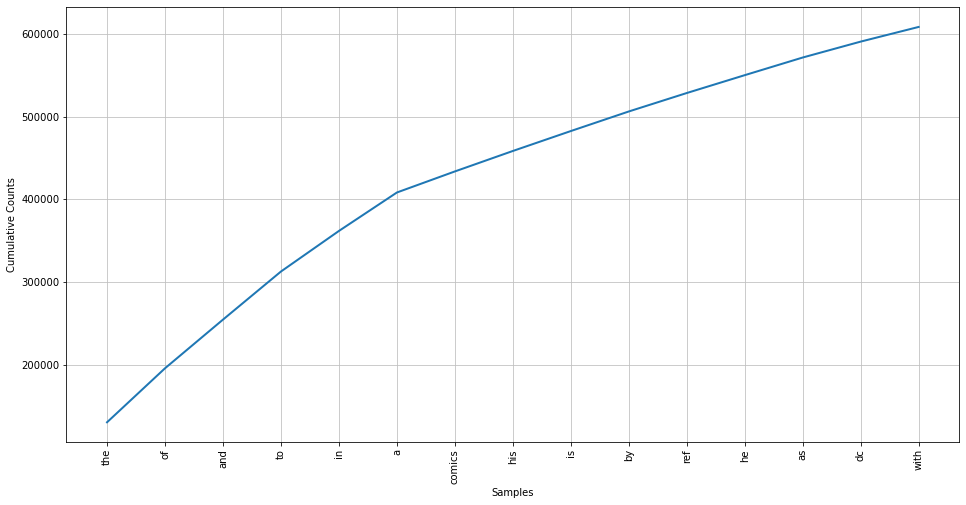

In [56]:
plt.figure(figsize=(16,8))
freq_dist.plot(15, cumulative=True)
plt.show()

In [57]:
frdq_dc = FreqDist(words_dc)

stopwords = nltk.corpus.stopwords.words('english')
words = [w for w in frdq_dc]
for w in words: 
        if w in stopwords or not w.isalpha():
            frdq_dc.pop(w)
        #return len(content) / len(text)
frdq_dc.most_common(15)

[('comics', 25432),
 ('ref', 22275),
 ('dc', 19211),
 ('batman', 11083),
 ('category', 8796),
 ('cite', 8615),
 ('character', 7433),
 ('series', 7351),
 ('new', 7293),
 ('superman', 6679),
 ('characters', 6603),
 ('vol', 6346),
 ('justice', 6293),
 ('league', 6142),
 ('black', 5514)]

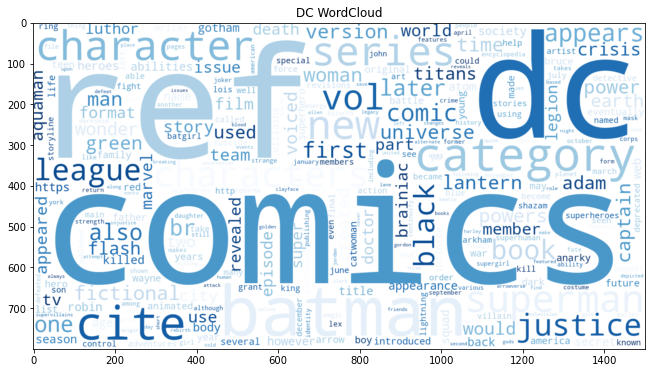

In [58]:
plt.figure(figsize=(12,6))
dc_wc = WordCloud(background_color="white", width=1500, height=800, 
                    max_words = 300, colormap = 'Blues')
dc_wc.generate_from_frequencies(frdq_dc)

plt.imshow(dc_wc, interpolation="bilinear")
plt.title('DC WordCloud')
plt.show()

In [34]:
tokens_dc = FreqDist(words_dc)

stopwords = nltk.corpus.stopwords.words('english')
words = [w for w in tokens_dc]
for w in words: 
        if w in stopwords or not w.isalpha():
            tokens_dc.pop(w)

In [10]:
with open('full_marvel.txt', 'w') as outfile:
    
    for i in os.listdir():
        if i.endswith(".txt"):
            with open(i, 'r') as infile:
                if "marvel" in i:
                    outfile.write(infile.read())
        
                outfile.write("\n")

In [11]:
raw = open('full_marvel.txt').read()
marvel_tokens = word_tokenize(raw)

In [15]:
words_marvel = [w.lower() for w in marvel_tokens if w.isalpha()]

In [36]:
tokens_marvel = FreqDist(words_marvel)

stopwords = nltk.corpus.stopwords.words('english')
words = [w for w in tokens_marvel]
for w in words: 
        if w in stopwords or not w.isalpha():
            tokens_marvel.pop(w)

In [37]:
def tf(token_list):
    
    tf={}
    
    for word in token_list:
        if word in tf:
            tf[word] += 1
        else:
            tf[word] = 1
            
    for key in tf.keys():
        tf[key] = tf[key]/len(token_list)
    
    return tf

In [38]:
common_words = set(tokens_marvel).intersection(set(tokens_dc))

In [39]:
def idf(token_list, common_words_set):
      
    idf={}
    
    for word in token_list:
        if word not in idf:
            if word in common_words_set:
                idf[word] = 1 + math.log(2/2)
            else:
                idf[word] = 1 + math.log(2/1)    
    
    return idf

In [40]:
def tfidf(token_list, common_words_set):
    
    tfidf = {}
    
    tf = term_frequency(token_list)
    idf = inverse_document_frequency(token_list, common_words_set)
    
    for key, value in tf.items():
        tfidf[key] = value*idf[key]
    
    return tfidf

In [43]:
marvel_tfidf = compute_tfidf(tokens_marvel, common_words)
dc_tfidf = compute_tfidf(tokens_dc, common_words)

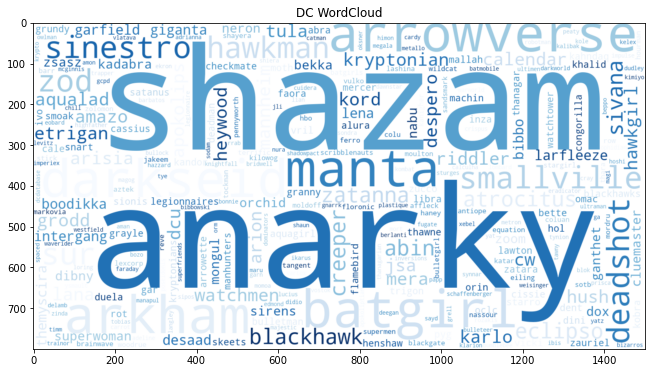

In [45]:
plt.figure(figsize=(12,6))
dc_wc = WordCloud(background_color="white", width=1500, height=800, 
                    max_words = 300, colormap = 'Blues')
dc_wc.generate_from_frequencies(dc_tfidf)

plt.imshow(dc_wc, interpolation="bilinear")
plt.title('DC WordCloud')
plt.show()

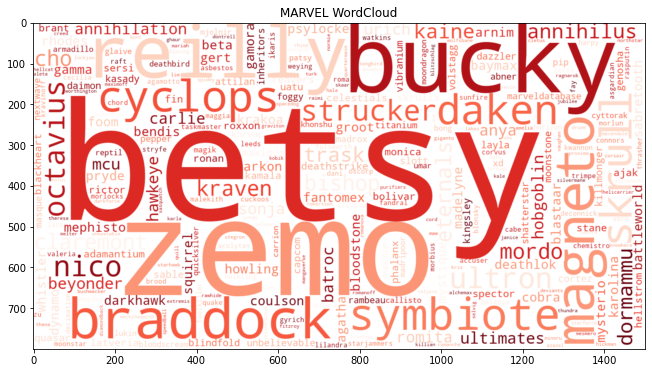

In [49]:
plt.figure(figsize=(12,6))
marvel_wc = WordCloud(background_color="white", width=1500, height=800, 
                    max_words = 300, colormap = 'Reds')
marvel_wc.generate_from_frequencies(marvel_tfidf)

plt.imshow(marvel_wc, interpolation="bilinear")
plt.title('MARVEL WordCloud')
plt.show()